### Load data from CSV into Pandas DataFrame

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

#os.chdir('/Users/ggheo/code/mycode/python-workshops/pandas-examples/tennis')

matches = pd.read_csv("wta_matches_2017.csv")
pd.set_option("display.max_rows", 5)

### Analyze matches played by Simona Halep

In [8]:
pd.set_option("display.max_rows", 10)
matches_simona = matches.loc[(matches.winner_name=='Simona Halep') | (matches.loser_name=='Simona Halep')]
matches_simona.sort_values(by=['tourney_date','tourney_name'])

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
74,2017-1063,Shenzhen,Hard,32,I,20170102,286,211701,NaN,NaN,...,16.0,2.0,2.0,88.0,50.0,29.0,13.0,15.0,3.0,11.0
90,2017-1063,Shenzhen,Hard,32,I,20170102,270,201594,2.0,NaN,...,3.0,3.0,2.0,70.0,45.0,30.0,9.0,12.0,1.0,5.0
167,2017-580,Australian Open,Hard,128,G,20170116,116,201603,NaN,NaN,...,1.0,2.0,1.0,71.0,50.0,29.0,8.0,8.0,7.0,11.0
281,2017-1086,St. Petersburg,Hard,32,I,20170130,297,212001,NaN,WC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,2017-1086,St. Petersburg,Hard,32,I,20170130,293,201594,1.0,NaN,...,5.0,3.0,5.0,87.0,55.0,42.0,5.0,11.0,8.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,2017-M015,Beijing,Hard,64,P,20171002,270,201594,2.0,NaN,...,1.0,5.0,2.0,45.0,21.0,13.0,8.0,5.0,4.0,7.0
2411,2017-M015,Beijing,Hard,64,P,20171002,238,201594,2.0,NaN,...,10.0,1.0,8.0,80.0,46.0,31.0,11.0,13.0,4.0,9.0
2566,2017-0808,Singapore,Hard,8,I,20171023,297,202494,4.0,NaN,...,1.0,2.0,1.0,50.0,36.0,25.0,6.0,9.0,2.0,5.0
2567,2017-0808,Singapore,Hard,8,I,20171023,296,201496,6.0,NaN,...,1.0,1.0,0.0,41.0,26.0,14.0,4.0,7.0,3.0,8.0


### Tournaments with most winning aces

                            w_ace
tourney_name                     
Beijing                      17.0
Wimbledon                    14.0
Eastbourne                   11.0
Madrid                       11.0
Miami                         9.0
Roland Garros                 8.0
Cincinnati                    7.0
Us Open                       7.0
Singapore                     7.0
Rome                          6.0
Indian Wells                  6.0
Fed Cup WG2 R1: ROU vs GBR    5.0
Shenzhen                      4.0
Toronto                       4.0
Washington                    4.0
St. Petersburg                3.0
Stuttgart                     3.0
Australian Open               2.0
Wuhan                         0.0


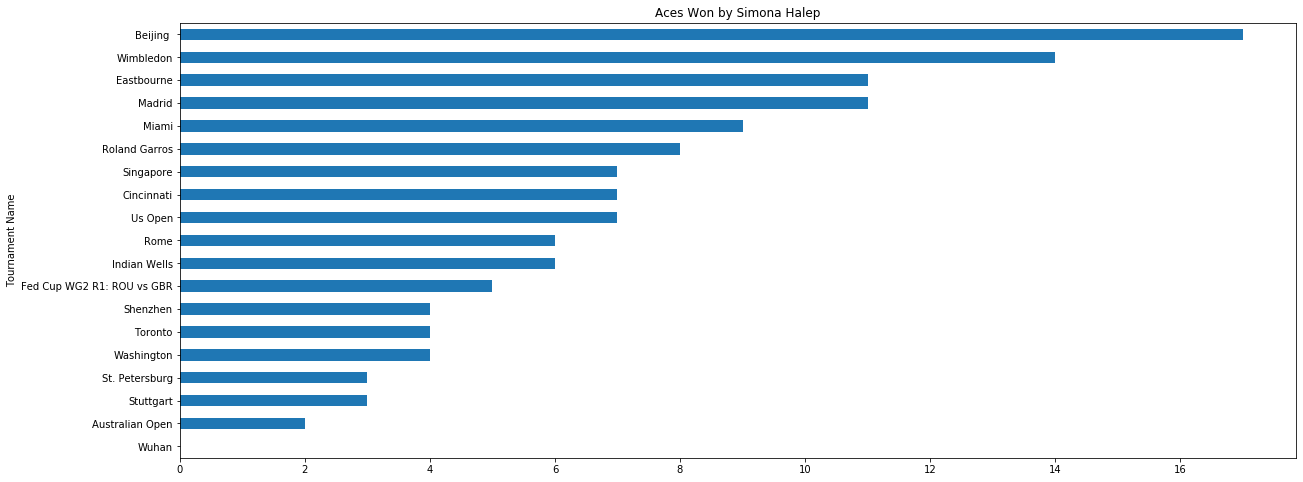

In [9]:
pd.set_option("display.max_rows", 20)
aces = matches_simona.groupby(['tourney_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], 
    ascending=False)
print(aces)
aces = aces.reset_index()
aces.columns = ['Tournament Name', 'Aces Won']
aces = aces.sort_values('Aces Won',ascending=True)
aces.plot('Tournament Name','Aces Won', 
    kind='barh', 
    title='Aces Won by Simona Halep', 
    legend=False,
    figsize=(20,8))

### Tournaments with most matches won

In [10]:
pd.set_option("display.max_rows", 20)
matches_won_simona = matches.loc[(matches.winner_name=='Simona Halep')]

#### Sorted by wins

                            round
tourney_name                     
Madrid                          6
Roland Garros                   6
Beijing                         5
Cincinnati                      4
Rome                            4
Wimbledon                       4
Miami                           3
Toronto                         3
Eastbourne                      2
Fed Cup WG2 R1: ROU vs GBR      2
Stuttgart                       2
Washington                      2
Indian Wells                    1
Shenzhen                        1
Singapore                       1
St. Petersburg                  1


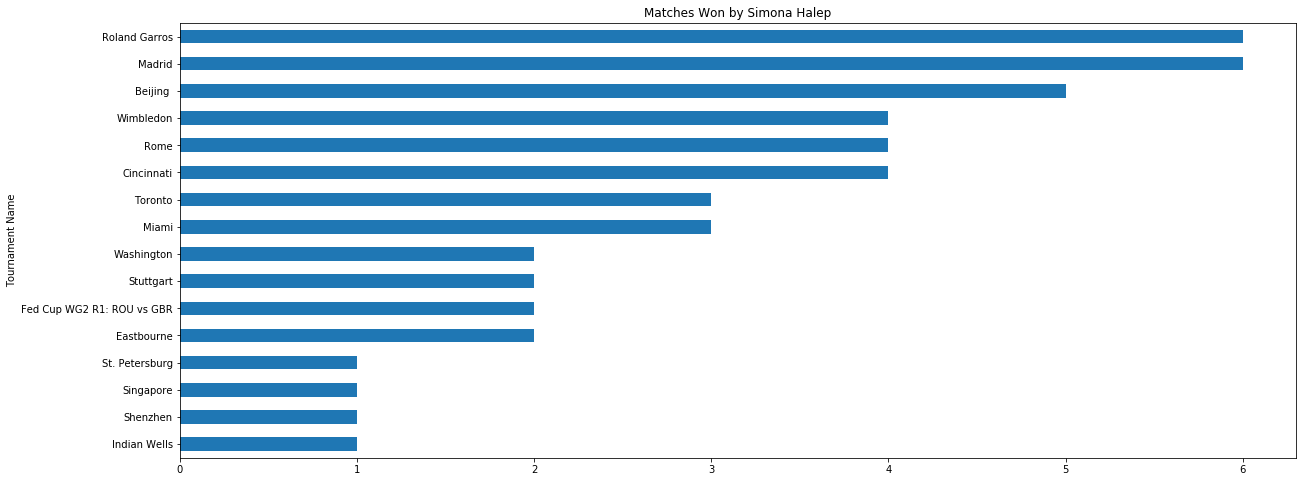

In [11]:
mw = matches_won_simona.groupby(['tourney_name']).agg({'round':'count'}).fillna(0).sort_values(['round'], 
    ascending=False)
print(mw)
mw = mw.reset_index()
mw.columns = ['Tournament Name', 'Rounds Won']
mw = mw.sort_values('Rounds Won',ascending=True)
mw.plot('Tournament Name','Rounds Won', 
    kind='barh', 
    title='Matches Won by Simona Halep', 
    legend=False,
    figsize=(20,8))

#### Rounds won sorted by tournament date

                                         round
tourney_name               tourney_date       
Shenzhen                   20170102          1
St. Petersburg             20170130          1
Indian Wells               20170306          1
Miami                      20170320          3
Fed Cup WG2 R1: ROU vs GBR 20170422          2
Stuttgart                  20170424          2
Madrid                     20170508          6
Rome                       20170515          4
Roland Garros              20170529          6
Eastbourne                 20170626          2
Wimbledon                  20170703          4
Washington                 20170731          2
Toronto                    20170807          3
Cincinnati                 20170814          4
Beijing                    20171002          5
Singapore                  20171023          1


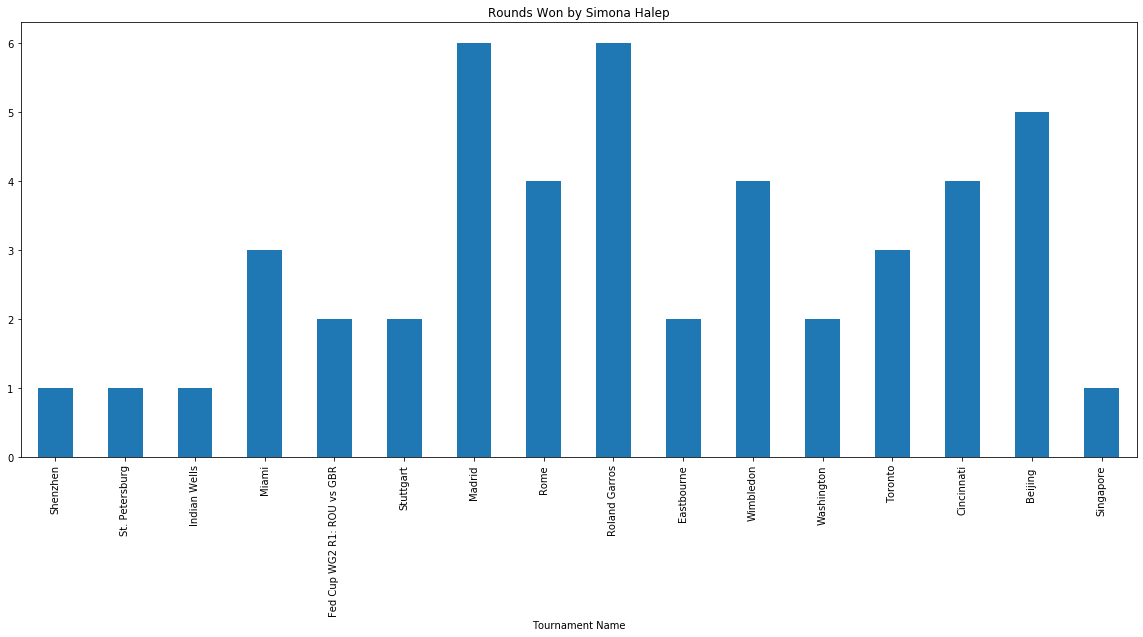

In [12]:
mw = matches_won_simona.groupby(['tourney_name', 'tourney_date']).agg({'round':'count'}).fillna(0).sort_values(['tourney_date'])
print(mw)
mw = mw.reset_index()
mw.columns = ['Tournament Name', 'Tournament Date', 'Rounds Won']
mw = mw.sort_values('Tournament Date',ascending=True)
mw.plot('Tournament Name','Rounds Won', 
    kind='bar', 
    title='Rounds Won by Simona Halep', 
    legend=False,
    figsize=(20,8))

### Titles won

#### Number of rounds per tournament (for all players)

In [13]:
pd.set_option("display.max_rows", 40)
rounds_per_tourney = matches.groupby(['tourney_name', 'tourney_date', 'round']).agg({'round':'nunique'}).fillna(0).sort_values(['tourney_name'],
    ascending=True)
print(rounds_per_tourney)

rounds_per_tourney = rounds_per_tourney.groupby(['tourney_name', 'tourney_date']).agg({'round':'sum'}).sort_values(['tourney_date'],
    ascending=True)
rounds_per_tourney.rename(columns={'round':'total_rounds'}, inplace=True)
print(rounds_per_tourney)

                                     round
tourney_name     tourney_date round       
'S-Hertogenbosch 20170612     F          1
                              QF         1
                              R16        1
                              R32        1
                              SF         1
...                                    ...
Zhengzhou        20170417     QF         1
                              SF         1
Zhuhai           20171031     RR         1
                              F          1
                              SF         1

[371 rows x 1 columns]
                                       total_rounds
tourney_name             tourney_date              
Auckland                 20170102                 5
Shenzhen                 20170102                 5
Brisbane                 20170102                 5
Hobart                   20170109                 5
Sydney                   20170109                 5
...                                             ...
H

#### Number of winning rounds for Simona Halep

In [14]:
rounds_per_tourney_simona = matches_won_simona.groupby(['tourney_name', 'tourney_date', 'round']).agg({'round':'nunique'}).fillna(0).sort_values(['tourney_name'],
    ascending=True)
print(rounds_per_tourney_simona)

rounds_per_tourney_simona = rounds_per_tourney_simona.groupby(['tourney_name', 'tourney_date']).agg({'round':'sum'}).sort_values(['tourney_date'],
    ascending=True)
rounds_per_tourney_simona.rename(columns={'round':'total_rounds_simona'}, inplace=True)
print(rounds_per_tourney_simona)

                                 round
tourney_name tourney_date round       
Beijing      20171002     QF         1
                          R16        1
                          R32        1
                          R64        1
                          SF         1
...                                ...
Washington   20170731     R32        1
Wimbledon    20170703     R128       1
                          R16        1
                          R32        1
                          R64        1

[46 rows x 1 columns]
                                         total_rounds_simona
tourney_name               tourney_date                     
Shenzhen                   20170102                        1
St. Petersburg             20170130                        1
Indian Wells               20170306                        1
Miami                      20170320                        3
Fed Cup WG2 R1: ROU vs GBR 20170422                        1
Stuttgart                  20170424        

#### Merge rounds_per_tourney and rounds_per_tourney_simona

In [15]:
rounds_per_tourney_merged = rounds_per_tourney_simona.merge(rounds_per_tourney, on=['tourney_name', 'tourney_date'])
print(rounds_per_tourney_merged)

                                         total_rounds_simona  total_rounds
tourney_name               tourney_date                                   
Shenzhen                   20170102                        1             5
St. Petersburg             20170130                        1             5
Indian Wells               20170306                        1             7
Miami                      20170320                        3             7
Fed Cup WG2 R1: ROU vs GBR 20170422                        1             1
Stuttgart                  20170424                        2             5
Madrid                     20170508                        6             6
Rome                       20170515                        4             6
Roland Garros              20170529                        6             7
Eastbourne                 20170626                        2             6
Wimbledon                  20170703                        4             7
Washington               

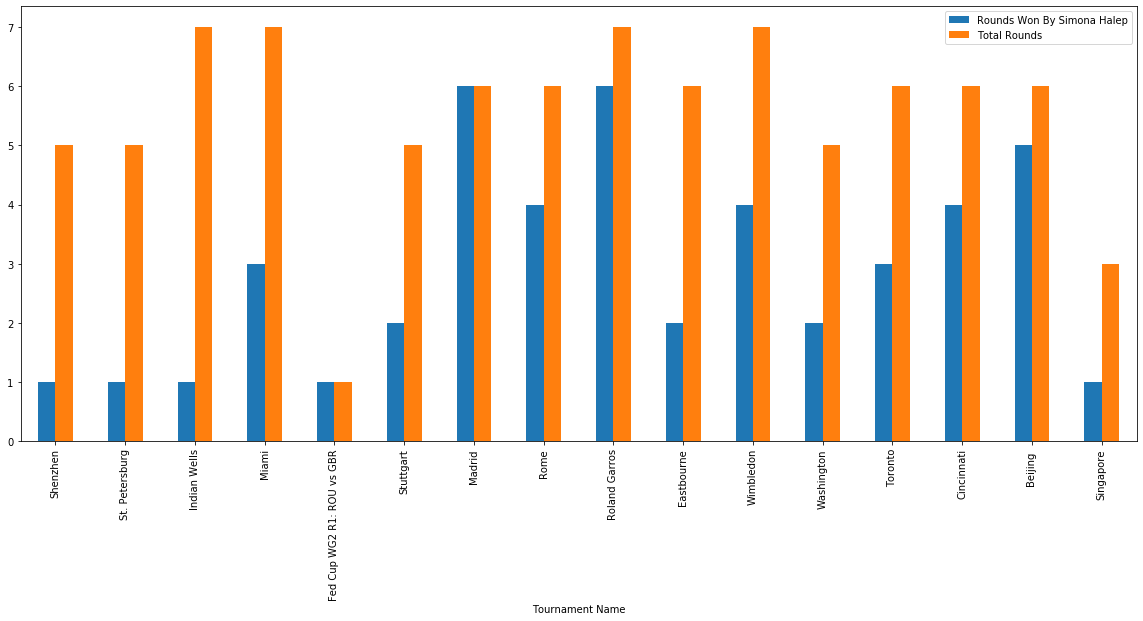

In [16]:
rounds_per_tourney_merged = rounds_per_tourney_merged.reset_index()
rounds_per_tourney_merged.rename(
    columns={
        'tourney_name':'Tournament Name', 
        'tourney_date': 'Tournament Date',
        'total_rounds_simona':  'Rounds Won By Simona Halep',
        'total_rounds': 'Total Rounds'}, 
    inplace=True)
rounds_per_tourney_merged = rounds_per_tourney_merged.sort_values('Tournament Date',ascending=True)
#print(rounds_per_tourney_merged)
rounds_per_tourney_merged.plot(x='Tournament Name', y=['Rounds Won By Simona Halep', 'Total Rounds'],
    kind='bar', 
    legend=True,
    figsize=(20,8))